In [1]:
import pandas as pd
import numpy as np
import scipy.stats
from matplotlib import pyplot as plt
import math

In [2]:
df = pd.read_csv('hw1.csv', sep=';', decimal=',', index_col=0)

In [3]:
df.head()

,program_name,performance,is_ege,age
1,math&phys,0.606203,no,17
2,math&phys,0.648850,yes,18
3,math&phys,0.729141,no,17
4,math&phys,0.863283,yes,17
5,math&phys,0.580673,no,17


In [4]:
def confidence_interval(series, t=2):
    interval = t * np.std(series, ddof=1) / math.sqrt(series.count())
    return (round(np.mean(series) - interval, 4), round(np.mean(series) + interval, 4))

In [5]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    if n == 0:
        return
    m, se = np.mean(a), scipy.stats.sem(a)
    # https://en.wikipedia.org/wiki/Student%27s_t-distribution#Table_of_selected_values
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n - 1)
    return (round(m - h, 4), round(m + h, 4))

In [6]:
def print_confidence_interval(data, title = ''):
    ypos = 0
    lines = ['']
    for key, value in data.items():
        lines.append(key)
        ypos = len(lines) - 1
        plt.plot(value['ci'], (ypos, ypos), '|-', color='orange', markersize=10)
        plt.plot(value['mean'], ypos, 'o', color='orange', markersize=5)
    lines.append('')
    plt.yticks(range(len(lines)), lines)
    plt.title(title)
    plt.show()

In [7]:
df.groupby(by="program_name", as_index=False).performance.agg({
    ".n": "count", # размер выборки
    ".mu": "mean", # мат. ожидание
    ".var": "var", # несмещенная дисперсия
    ".sd": "std", # стандартное отклонение
    ".se": "sem", # стандартная ошибка
    ".cv": lambda x: np.std(x, ddof=1) / np.mean(x) * 100, # коэффициент вариации
    ".min": "min",
    ".max": "max",
    ".median": "median",
    ".ci95" : lambda x: confidence_interval(x, t=2),
    ".ci95t" : lambda x: mean_confidence_interval(x, confidence=0.95),
    ".ci99" : lambda x: confidence_interval(x, t=3),
    ".ci99t" : lambda x: mean_confidence_interval(x, confidence=0.99),
}) 

,program_name,.n,.mu,.var,.sd,.se,.cv,.min,.max,.median,.ci95,.ci95t,.ci99,.ci99t
0,math&phys,10,0.720606,0.015942,0.126262,0.039928,17.521671,0.524715,0.877870,0.740393,"(0.6408, 0.8005)","(0.6303, 0.8109)","(0.6008, 0.8404)","(0.5908, 0.8504)"
1,russ&lit,25,0.797763,0.012154,0.110245,0.022049,13.819290,0.605356,0.996762,0.792832,"(0.7537, 0.8419)","(0.7523, 0.8433)","(0.7316, 0.8639)","(0.7361, 0.8594)"


In [8]:
df.groupby(by="is_ege", as_index=False).performance.agg({
    ".n": "count", # размер выборки
    ".mu": "mean", # мат. ожидание
    ".var": "var", # несмещенная дисперсия
    ".sd": "std", # стандартное отклонение
    ".se": "sem", # стандартная ошибка
    ".cv": lambda x: np.std(x, ddof=1) / np.mean(x) * 100, # коэффициент вариации
    ".min": "min",
    ".max": "max",
    ".median": "median",
    ".ci95" : lambda x: confidence_interval(x, t=2),
    ".ci95t" : lambda x: mean_confidence_interval(x, confidence=0.95),
    ".ci99" : lambda x: confidence_interval(x, t=3),
    ".ci99t" : lambda x: mean_confidence_interval(x, confidence=0.99),
}) 

,is_ege,.n,.mu,.var,.sd,.se,.cv,.min,.max,.median,.ci95,.ci95t,.ci99,.ci99t
0,no,25,0.768338,0.016618,0.128912,0.025782,16.777995,0.524715,0.996762,0.752014,"(0.7168, 0.8199)","(0.7151, 0.8215)","(0.691, 0.8457)","(0.6962, 0.8404)"
1,yes,10,0.794170,0.008233,0.090735,0.028693,11.425146,0.648850,0.930949,0.780868,"(0.7368, 0.8516)","(0.7293, 0.8591)","(0.7081, 0.8802)","(0.7009, 0.8874)"


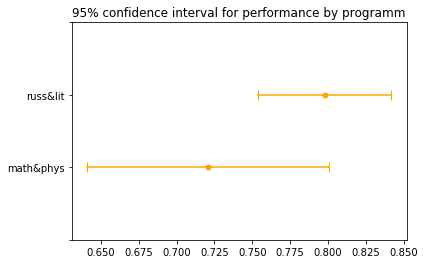

In [9]:
data = {}
for key, group in df.groupby('program_name', as_index=False):
    data[key] = {
        'mean': group['performance'].mean(),
        'ci': confidence_interval(group['performance'], t=2),
    }
print_confidence_interval(data, '95% confidence interval for performance by programm')

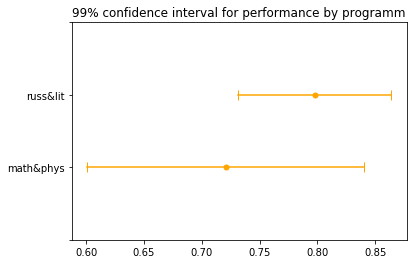

In [10]:
data = {}
for key, group in df.groupby('program_name', as_index=False):
    data[key] = {
        'mean': group['performance'].mean(),
        'ci': confidence_interval(group['performance'], t=3),
    }
print_confidence_interval(data, '99% confidence interval for performance by programm')